# Hackathon Eda on Pub-G data

## Feature in the Pub-g data

- DBNOs - Number of enemy players knocked.
- assists - Number of enemy players this player damaged that were killed by teammates.
- boosts - Number of boost items used.
- damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.
- headshotKills - Number of enemy players killed with headshots.
- heals - Number of healing items used.
- Id - Player’s Id
- killPlace - Ranking in match of number of enemy players killed.
- killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
- killStreaks - Max number of enemy players killed in a short amount of time.
- kills - Number of enemy players killed.
- longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
- matchDuration - Duration of match in seconds.
- matchId - ID to identify match. There are no matches that are in both the training and testing set.
- matchType - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
- rankPoints - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
- revives - Number of times this player revived teammates.
- rideDistance - Total distance traveled in vehicles measured in meters.
- roadKills - Number of kills while in a vehicle.
- swimDistance - Total distance traveled by swimming measured in meters.
- teamKills - Number of times this player killed a teammate.
  vehicleDestroys - Number of vehicles destroyed.
- walkDistance - Total distance traveled on foot measured in meters.
- weaponsAcquired - Number of weapons picked up.
- winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
- groupId - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
- numGroups - Number of groups we have data for in the match.
- maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
- winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

## Importing modules

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [268]:
df=pd.read_csv('data.csv')

In [269]:
df

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.000,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.000,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.000,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.000,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.000,0,0,1721.00,5,0,0.6429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111737,4209703,43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
1111738,4311549,d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
1111740,2138826,8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000


In [270]:
# Creating a random sample of data to perform The Eda
def samples(df,n):

    randomdf = sorted(np.random.permutation(len(df))[:n])
    return df.iloc[randomdf].copy()

In [302]:
data=samples(df,60000)

In [303]:
data.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
38,712657,498a70ceaa30a5,809085dcce22dd,e9d203a36b1d0a,0,0,114.00,1,0,2,...,0,0.0,0,0.0,0,0,122.70,1,0,0.1481
40,2404821,873558b0e5aee4,b79d9bddd897d4,76ab56c957972f,0,0,66.78,0,0,0,...,0,0.0,0,0.0,0,0,10.13,0,1512,0.0000
42,1666686,42e009d107df51,4ff2bf44b0d60e,057dce8c06cae5,1,0,98.00,1,0,0,...,0,0.0,0,0.0,0,0,1703.00,3,1504,0.5000
70,476420,a0988e4da75aed,a1bdeb03f1e34f,8eb34cf95f3487,0,1,61.16,0,0,0,...,0,1081.0,0,0.0,0,0,1325.00,5,0,0.6452


In [304]:
data.tail()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
1111685,132178,ee34b230ab8d85,9d17d1980f7c73,fba7649bef9829,2,1,438.2,0,1,2,...,1,0.0,0,0.0,0,0,947.10,3,1563,0.9000
1111686,1591271,eeb4ac1f360928,324e8f5e8fd871,1c484f4029f2ca,0,0,200.0,1,0,0,...,0,0.0,0,0.0,0,0,206.10,2,0,0.4565
1111692,2482186,85c3a5abfbc097,a06c34b185233f,3134aa99b03445,0,0,0.0,0,0,0,...,0,0.0,0,0.0,0,0,204.20,2,0,0.0833
1111699,3102961,d55a8cf856ca86,67b07892fcb353,ac0a4007348ab8,1,6,857.4,5,3,3,...,0,4642.0,0,0.0,0,0,2016.00,4,1513,0.9375
1111739,3521011,c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.3,1,0,0,...,0,0.0,0,0.0,0,0,60.45,1,0,0.7174


In [305]:
data.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [306]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 1111739
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               60000 non-null  object 
 1   groupId          60000 non-null  object 
 2   matchId          60000 non-null  object 
 3   assists          60000 non-null  int64  
 4   boosts           60000 non-null  int64  
 5   damageDealt      60000 non-null  float64
 6   DBNOs            60000 non-null  int64  
 7   headshotKills    60000 non-null  int64  
 8   heals            60000 non-null  int64  
 9   killPlace        60000 non-null  int64  
 10  killPoints       60000 non-null  int64  
 11  kills            60000 non-null  int64  
 12  killStreaks      60000 non-null  int64  
 13  longestKill      60000 non-null  float64
 14  matchDuration    60000 non-null  int64  
 15  matchType        60000 non-null  object 
 16  maxPlace         60000 non-null  int64  
 17  numGroups 

In [308]:
data['winPlacePerc'].isnull().sum()

0

In [309]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,60000.00000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.23185,1.109650,130.900407,0.658383,0.225483,1.351800,47.539983,509.112667,0.929167,0.547483,...,0.161850,609.711418,0.003783,4.638714,0.024283,0.007850,1153.245047,3.659483,611.669733,0.472458
std,0.59220,1.710987,169.509112,1.135122,0.595130,2.629997,27.476683,628.283037,1.556007,0.710460,...,0.466753,1506.737671,0.081050,30.738614,0.170668,0.090674,1186.370026,2.456929,740.720961,0.308144
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.200000,2.000000,0.000000,0.197900
50%,0.00000,0.000000,85.495000,0.000000,0.000000,0.000000,47.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,683.150000,3.000000,0.000000,0.458300
75%,0.00000,2.000000,186.825000,1.000000,0.000000,2.000000,71.000000,1171.000000,1.000000,1.000000,...,0.000000,0.027025,0.000000,0.000000,0.000000,0.000000,1970.000000,5.000000,1495.000000,0.744200
max,11.00000,21.000000,3441.000000,21.000000,19.000000,41.000000,100.000000,2000.000000,36.000000,9.000000,...,15.000000,19020.000000,7.000000,1032.000000,4.000000,2.000000,12070.000000,95.000000,1942.000000,1.000000


## Univariate analysis

### Longest distance kills

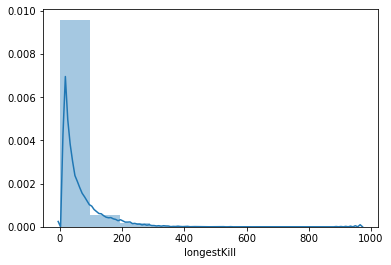

In [310]:
plt.figure(figsize=(6,4))
sns.distplot(data['longestKill'], bins=10)
plt.show()

In [311]:
# Check out players who made kills with a distance of more than 1 km
data[data['longestKill'] >= 800]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
384963,f6ab2039b9d17e,d5565231099edb,f2db45f89754b4,2,3,1440.0,6,6,2,2,...,0,2014.0,0,18.27,0,0,4324.0,6,0,1.0
1087604,0d092fb8a44b44,88341f73c0b55a,07e579c0dc14ff,2,2,2258.0,20,7,2,1,...,1,0.0,0,0.00,0,1,4001.0,5,1628,1.0
1111427,6c943441519924,17a660a22b2b99,0314fb2fb89340,1,1,717.0,3,4,1,3,...,0,5559.0,0,0.00,0,0,2866.0,3,0,1.0


Around 3 people have longest kill with a distance more than 800 metres

### Walk Distance

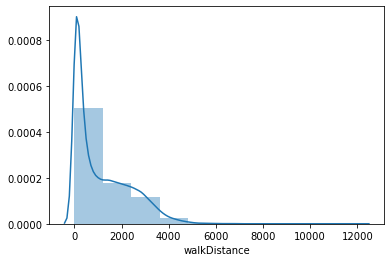

In [312]:
sns.distplot(data['walkDistance'], bins=10)

In [313]:
data[data['walkDistance'] >= 10000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
374030,6d39349d995de6,1b5718b1842acc,883d51791da805,0,3,149.90,0,0,1,25,...,0,0.0060,0,36.20,0,1,10450.0,5,1542,0.8000
575647,20d9be2f2bdf7e,8ef484f4bfd8cb,530308ee939596,0,2,0.00,0,0,9,47,...,0,1732.0000,0,49.02,0,0,10730.0,4,1666,0.8526
579752,58ad7dc9cf101e,c963553dc937e9,926681ea721a47,0,1,144.60,1,0,1,26,...,0,1838.0000,0,32.76,0,1,10340.0,7,1526,0.8333
595231,548d21615303eb,4fa33f70717772,6af2efa9aab7a5,0,5,33.00,1,0,1,20,...,1,0.0174,0,20.84,0,0,10970.0,6,1496,0.9600
1008689,955e60b09a96b1,30df08fe22a901,8669d01725f135,0,1,0.00,0,0,1,46,...,0,1823.0000,0,30.81,0,0,10370.0,3,0,0.6957
1031397,63a6a6dd61b8fd,fe2c60acdf43cc,71e031a2aaa08e,0,4,77.82,0,1,5,26,...,0,0.0263,0,117.80,0,0,11200.0,6,1555,0.8621
1050460,fb83e60fb78007,be972ac29f8ea3,0a2a1c87ac175b,0,2,0.00,0,0,1,42,...,0,922.6000,0,38.57,0,0,12070.0,3,1617,0.8842


The people have a walk distance more than 10 km are 7

### Swim distsnce

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


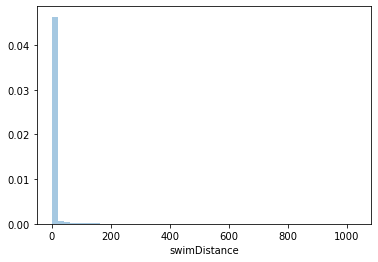

In [314]:
sns.distplot(data['swimDistance'])

In [315]:
data[data['swimDistance'] >= 1000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
963247,d9c035f8922496,5992ed5680ea50,e14790e3d7f086,0,3,100.0,1,0,3,47,...,0,0.0,0,1032.0,0,0,1512.0,3,0,0.8333


One id swimmed more than 1km

### Ride Distance

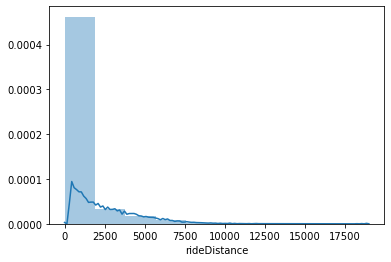

In [316]:
sns.distplot(data['rideDistance'],bins=10)

In [317]:
data[data['rideDistance'] >= 15000]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
25629,e3ff8861d4e00d,0bd78dbbe461c8,19063d15b08c72,0,2,14.59,0,0,0,52,...,1,15500.0,0,0.0,0,0,727.1,0,1537,0.5217
286941,6e2d139b75a231,ed29eca4aef48e,bec8a45e06de60,0,3,56.04,2,0,13,11,...,1,15210.0,0,0.0,0,0,1722.0,4,0,0.9655
288215,1be5e6c1d31dd7,b2a2388225a929,b16ade41d5ad73,1,1,164.90,0,0,2,65,...,0,15680.0,0,0.0,1,1,1052.0,2,1532,0.4643
375852,d896e1b5514eaf,abc4ef6aab3e0f,fb35a340f5970e,0,1,282.50,1,1,1,18,...,0,19020.0,0,0.0,0,0,812.2,4,0,0.7500
931269,3691eb136316ec,39ea8e0e46cf86,2208c92dee9ca0,0,2,221.70,1,0,4,33,...,0,17410.0,0,0.0,0,0,1225.0,5,1514,0.5714


Five people who have rdden more than 15km

### Head shot rate

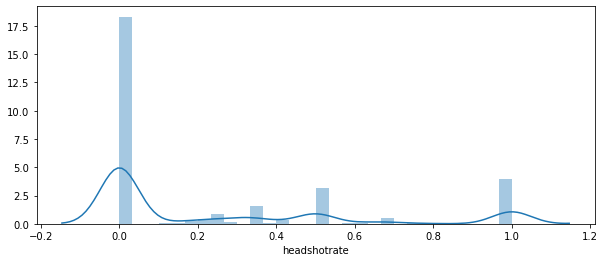

In [318]:
data['headshotrate']=(data['headshotKills']/data['kills'])
plt.figure(figsize=(10,4))
sns.distplot(data['headshotrate'])
            

plt.show()

In [319]:
data[data['headshotrate']==0.1]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotrate
106095,808203537fa1bc,7732af508ba42c,65d8eb828b0146,2,5,1047.0,7,1,5,1,...,0.0,0,0.00,0,0,2942.0,5,1422,1.0000,0.1
150328,08971c38e8a586,e009f2944d673c,23a3a098be1e83,2,6,961.5,7,1,3,1,...,0.0,0,99.70,0,0,3340.0,5,0,0.9615,0.1
206322,a74601ec27919e,b20ffe7581f29d,b7080b3c2a16a6,0,4,1550.0,11,1,2,1,...,1977.0,0,39.32,0,0,4184.0,7,0,0.8846,0.1
243672,2db17840400bd5,6380b10c81e491,add477c4c83eea,1,6,945.2,6,1,10,1,...,0.0,0,0.00,0,0,3926.0,5,1720,1.0000,0.1
662922,73dccd7e7c2536,cc3085c0983c50,e15dc90a96abb3,0,8,1057.0,7,1,9,1,...,11470.0,0,0.00,0,0,2507.0,5,0,0.9643,0.1
762260,967be23f600c0c,33d1348c03210a,1367a04cc1d642,0,2,946.2,7,1,0,1,...,66.7,0,0.00,0,0,2168.0,3,0,1.0000,0.1
876457,fc04d36d2c5258,0647e7ea57e4f9,70f54c8eb2404b,6,0,981.6,0,1,13,23,...,0.0,0,0.00,0,0,1080.0,19,0,0.3333,0.1
884359,35826f3af3be3d,312a494c5798d8,c7da8339a68e90,2,6,904.4,7,1,14,2,...,5143.0,0,0.00,0,0,2583.0,5,1531,0.7931,0.1
967159,33145b312e53f4,4fde2ce0006f5a,c709efd5c78ddc,0,4,1118.0,7,1,7,1,...,0.0,0,0.00,0,1,3424.0,8,1500,0.9762,0.1


There are 9 people who has 100% head shot accuracy (outlier)

### Heals

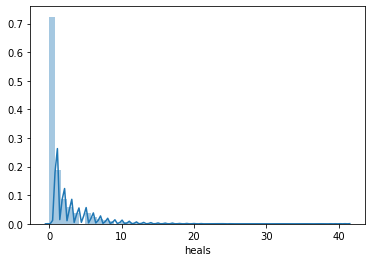

In [320]:
sns.distplot(data['heals'])


In [321]:
data[data['heals']>=35]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotrate
336463,679d2ff2bd9c3f,cddab6fc6f7285,f16adc3c4f9375,0,3,0.00,0,0,41,45,...,0.0,0,0.0,0,0,5075.0,5,0,0.8557,NaN
562718,d838ff53fc74ad,73f7b3d8ce2c99,18a8d35f9d9791,1,5,47.95,1,0,39,16,...,5968.0,0,0.0,0,0,2490.0,6,1546,0.9231,0.00
591490,773bd0b511fb2e,e67a370ae1497e,f28828409a28be,1,9,454.80,3,1,37,3,...,5650.0,0,0.0,0,0,1443.0,4,1645,1.0000,0.25
627994,759adec80917c6,4afe5df61c60d1,26ccc0c3f433f8,0,5,121.80,1,0,36,25,...,9102.0,0,0.0,0,0,1800.0,8,0,0.6400,0.00


Four Id have used more than 35 heal items

### Weapons Acquired

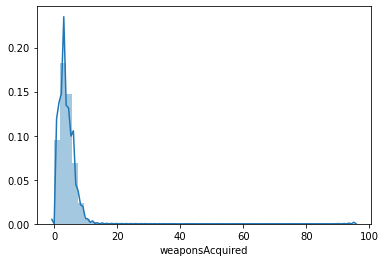

In [322]:
sns.distplot(data['weaponsAcquired'])


In [323]:
data[data['weaponsAcquired']>=40]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotrate
92011,d4bbd74d5d8174,5c510fc5f07286,04028905be0cf6,0,6,438.4,2,4,1,5,...,612.1,0,7.624,0,0,3765.0,43,1459,0.9149,1.000000
706647,0c9626ffd14e1c,4c4ee1e9eb8b5e,6680c7c3d17d48,6,5,1833.0,0,9,1,14,...,0.0,0,0.000,0,0,245.2,42,0,1.0000,0.428571
730332,438cabaa5dfbdd,596c155c524725,8e0bbeec19a929,0,0,0.0,0,0,0,56,...,0.0,0,0.000,0,0,807.6,95,0,0.5000,NaN
857342,8e1c9c4b0b630b,cc81024bc7875b,02cf1db07c3934,0,3,199.6,2,0,0,26,...,4888.0,0,0.000,0,0,1542.0,45,1519,0.7073,0.000000
1094817,65aeb25e49800d,aafdb65aaef16a,ab834eaffaeb51,4,0,1140.0,5,2,2,19,...,2474.0,0,0.000,0,0,1469.0,45,0,0.5333,0.250000


Five Id have used more than 40  weapons 

### Match Time

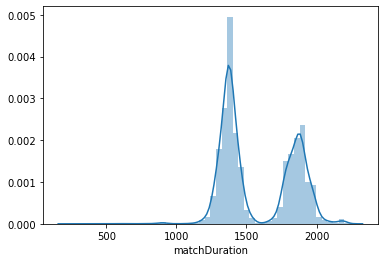

In [324]:
sns.distplot(data['matchDuration'])


In [325]:
print(max(data['matchDuration']))
print(min(data['matchDuration']))


2237
248


- Maximum duration of the game(2 matches)is 2237 and both were a solo match  
- Minimum is 248 and was a normal-solo-fpp

### Grouping by the type of match 

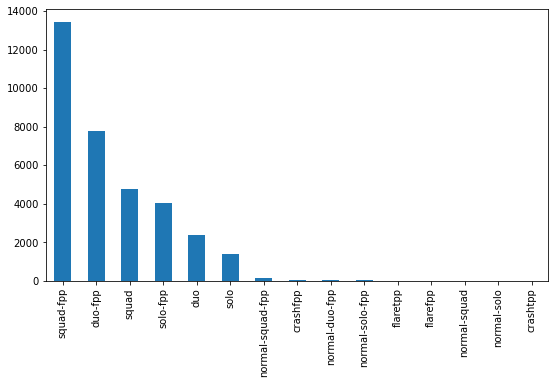

In [326]:
plt.figure(figsize = (9,5))
data.groupby('matchId')['matchType'].first().value_counts().plot.bar()

- The number of matchId are found in squad-fpp(12074) which the mostly played match type and the count drops drastically along duo-fpp(6958) being the second, squad(4336),solo-fpp,duo  are the next three among the top five matchType being played
- Solo having a value count in thousands later that there are very few or rather negligible amount played in the other types of matches

## Extra obervations based on different match types

In [327]:
data.groupby('matchType')[['heals','kills','headshotKills','killStreaks','weaponsAcquired']].sum()

,heals,kills,headshotKills,killStreaks,weaponsAcquired
matchType,,,,,
crashfpp,170,68,3,50,134
crashtpp,16,3,0,3,14
duo,5381,3827,871,2302,15450
duo-fpp,18093,12713,3042,7836,49214
flarefpp,11,5,1,5,46
flaretpp,44,27,3,13,117
normal-duo-fpp,127,96,31,29,346
normal-solo,6,34,6,10,93
normal-solo-fpp,57,196,66,40,382


- There are around 85680 weapons acquired in squad-fpp which is the highest no doubt being it the highest played match type
- The head shot kills are way low when comparing it with the kills 
- Other features like the kill tsreaks, heals, boost ,distance travelled are positively correated with the type of matches played

In [328]:
a=data.groupby('groupId')[['heals','kills','headshotKills','killStreaks','weaponsAcquired']].sum()

In [329]:
a.kills.sort_values(ascending=False)

groupId
4d632f8cce2bb4    36
b714859b8df4a1    30
338d6ab3bf5f19    27
79301c8bd41206    26
6991300e62a4a0    24
                  ..
faa3df5378e4d4     0
8e990245e7c5b4     0
8e97a367dff5b7     0
8e95e4858d542b     0
00006aa800b4a7     0
Name: kills, Length: 59133, dtype: int64

In [330]:
data[data['groupId']=='4d632f8cce2bb4']


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotrate
324452,dd983648eb1f22,4d632f8cce2bb4,d481bc1556f9a2,5,1,3441.0,0,10,12,1,...,0.0,0,0.0,1,0,64.94,38,0,1.0,0.277778


In [333]:
a.heals.sort_values(ascending=False)

groupId
cddab6fc6f7285    41
73f7b3d8ce2c99    39
e67a370ae1497e    37
4afe5df61c60d1    36
30aa839c9ce5aa    33
                  ..
6c20c301ef652c     0
6c21d3a9ff78f2     0
6c22288340cb16     0
6c228d2686c87f     0
00006aa800b4a7     0
Name: heals, Length: 59133, dtype: int64

In [334]:
data[data['groupId']=='cddab6fc6f7285']


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotrate
336463,679d2ff2bd9c3f,cddab6fc6f7285,f16adc3c4f9375,0,3,0.0,0,0,41,45,...,0.0,0,0.0,0,0,5075.0,5,0,0.8557,NaN


### Top 5 heals
- e7885a69a72615    49 
- 64b4e6d5a4489a    40
- 8bb14639f31235    38
- 82016344b70f64    35
- a362d115529e94    34

## Top 5 kills
- 4d632f8cce2bb4    36
- b714859b8df4a1    30
- 338d6ab3bf5f19    27
- 79301c8bd41206    26
- 6991300e62a4a0    24

# Point to peek at!
ID which has more number of kills(26) has 5 heals, 3 boosts, 10 assist, with 3 headshotkill interestingly has a less win place of about 0.6429

Whereas Id which has highest heals 49 has 4 kills , 2 head shot kill 5 boosts has a higher win place of 0.84

# Kills v/s heals,weapons acquired, win place, kill streaks

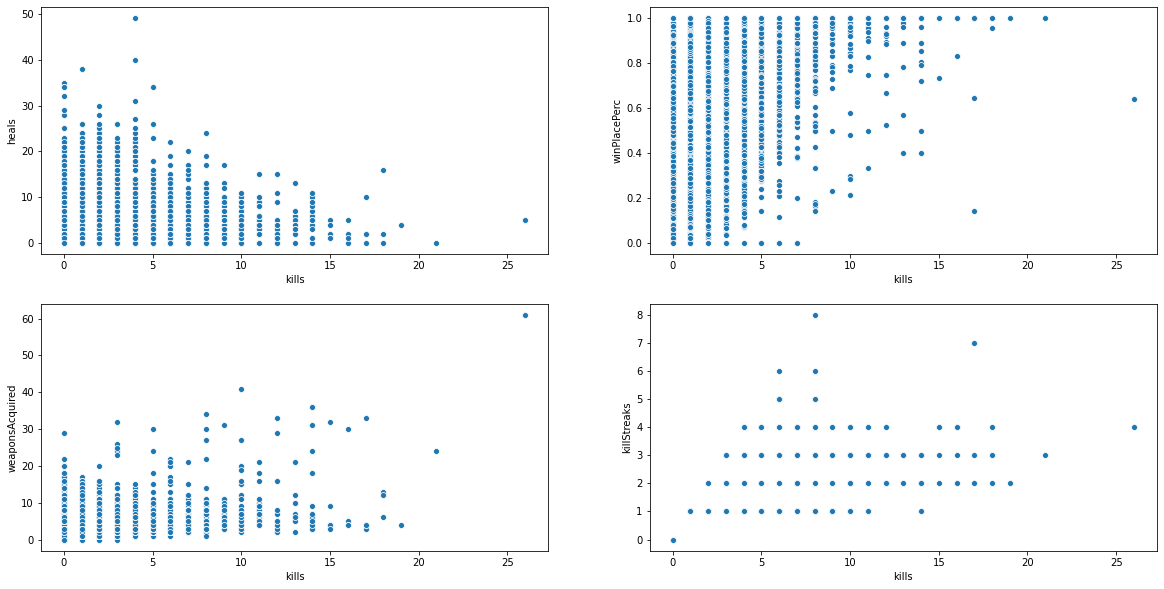

In [125]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.scatterplot(data.kills,data.heals)
plt.subplot(2,2,2)
sns.scatterplot(data.kills,data.winPlacePerc)
plt.subplot(2,2,3)
sns.scatterplot(data.kills,data.weaponsAcquired)
plt.subplot(2,2,4)
sns.scatterplot(data.kills,data.killStreaks)

- The number of kills is inversely proportional to the number of heals 
- The number of weapon acquired  are often less for the more number of kills but sometime there are quite high weapons acquired  at higher kill rates
- The win place probability are very few for the kill above 10
- There is a wide range of probability 0-1 for the kills less that 10 (seem to be the safer side to end up in the first place) 

# Lets fine the snakes!

In [167]:
# Create feature totalDistance
data['totalDistance'] = data['rideDistance'] + data['walkDistance'] + data['swimDistance']
# Create feature killsWithoutMoving
data['killsWithoutMoving'] = ((data['kills'] > 0) & (data['totalDistance'] == 0))

In [168]:
data

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving
91,801510a5ae7128,37d0ef12e2a351,2ab1022b6a588f,0,0,0.00,0,0,0,80,...,0,0.0,0,0,345.50,3,0,0.1071,345.50,False
124,db61a34dcf02b2,bb9ae1c47f7567,966ea0e60b9add,1,0,68.12,1,0,0,36,...,0,0.0,0,0,94.75,2,1555,0.1429,94.75,False
145,d7856623e49d29,9d21250f86d95a,18f4bbda0383e7,0,0,0.00,0,0,0,91,...,0,0.0,0,0,0.00,1,0,0.0319,0.00,False
188,054bd04742308d,483dfa20b9cf3f,1b159c69cebcf0,0,4,194.50,0,0,12,40,...,0,0.0,0,0,3478.00,6,0,0.9655,3478.00,False
197,2e7859d1d12175,2e4da845700d74,2103dad7aa30e8,1,3,520.90,2,0,1,8,...,0,0.0,0,0,1702.00,6,0,0.6739,2111.40,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111627,04e8d97660dff8,a7cb23219683ff,51ba88c42258e0,0,2,266.20,0,0,1,10,...,0,0.0,0,0,3896.00,5,1448,0.8272,5267.00,False
1111681,6b0fe9303aa242,0dfc7f1776d57c,24e12564fb5d76,0,0,50.50,0,0,1,71,...,0,0.0,0,0,576.20,2,0,0.3854,576.20,False
1111709,5cc446f7a70d96,c1099566a4edd5,f47934eed02c8e,0,0,0.00,0,0,0,74,...,0,0.0,0,0,168.00,3,0,0.1111,168.00,False
1111722,90ce43c21ca401,fe3297fddbfa32,91aa551b4b76a6,0,3,432.50,1,1,5,13,...,0,152.3,0,0,2512.00,5,0,0.9167,5398.30,False


In [169]:
# Check players who kills without moving
display(data[data['killsWithoutMoving'] == True].shape)
snakes=data[data['killsWithoutMoving' ] == True]
snakes

(15, 31)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving
63648,1535378c2bea01,f209d6168ba77d,fc0bbecba8db99,2,2,1305.0,14,3,4,17,...,0,0.0,1,0,0.0,20,1500,0.3000,0.0,True
124341,81407863a33171,5c6eb5d2fd4649,4f7f8d6cf558b4,2,0,273.8,0,1,0,44,...,0,0.0,0,0,0.0,14,0,0.2500,0.0,True
201346,4ed9387f6b88cb,8e5647e9c1dab4,3d70833b2e48bd,2,0,691.8,0,0,10,22,...,0,0.0,0,0,0.0,13,0,0.4286,0.0,True
210779,56843951b43207,c739922f5a1f3f,10b90df0620d73,2,0,285.6,0,1,2,25,...,0,0.0,0,0,0.0,11,0,0.4286,0.0,True
225405,91375c3d33a2b9,b64ab1cf692139,99d40c6e391e0b,0,0,100.0,1,0,0,25,...,0,0.0,0,0,0.0,6,0,1.0000,0.0,True
268269,a930fd1fb75a62,d55b4540d959e3,0287a3001f1447,2,0,456.9,0,2,0,19,...,0,0.0,2,0,0.0,20,0,0.0000,0.0,True
302628,1817c4e7e9fcae,615c050ff92aac,db6f6d1f0d4904,6,0,1043.0,0,2,0,10,...,0,0.0,0,0,0.0,33,0,0.5263,0.0,True
308043,f2127ca837d8e1,77c6c9280becda,d6be8e6354f722,0,0,891.7,0,3,0,7,...,0,0.0,0,0,0.0,19,1500,0.2857,0.0,True
384277,5a5ace1d68fd8e,2ecc6d70cc72a8,859d86a6a72640,1,1,232.0,0,2,5,20,...,0,0.0,0,0,0.0,20,1500,0.5556,0.0,True
473788,f9c9bc8109a1bd,94871c112912f3,93edb943c25530,1,0,169.3,0,1,0,35,...,0,0.0,0,0,0.0,12,0,0.0000,0.0,True


- There are 15 id who have their place kills without moving a single inch
- These can be see as outliers 

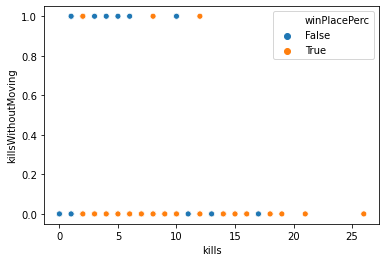

In [177]:
sns.scatterplot(data.kills,data.killsWithoutMoving,hue=data['winPlacePerc']>0.5)

There are few snake ID whose probability is more than 50 to be in the final place providing their kills are above 6

In [153]:
data[data.totalDistance<50]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,totalDistance,killsWithoutMoving
145,d7856623e49d29,9d21250f86d95a,18f4bbda0383e7,0,0,0.00,0,0,0,91,...,0,0.0,0,0,0.000,1,0,0.0319,0.000,False
1522,047915e7bb8f1f,206ac3ed5827a6,d63d794d2b56bd,0,0,0.00,0,0,0,77,...,0,0.0,0,0,6.971,1,1501,0.2292,6.971,False
1533,d9c83f9a66be77,0fbbeac668c903,57ffb2ec2b5f4c,0,0,0.00,0,0,0,88,...,0,0.0,0,0,30.560,2,1500,0.1111,30.560,False
1618,29f3320dc5db65,4ab8be75708325,5a9a6c50d597a0,0,0,100.00,1,0,0,91,...,0,0.0,0,0,9.094,0,1496,0.0000,9.094,False
1712,a8201be1c84b80,b8dd87999f0ad7,5b9d3e219fbc60,0,0,100.00,1,0,0,79,...,0,0.0,0,0,15.990,1,0,0.1739,15.990,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111235,9b34f9fb733556,2a7d2b1bf967e9,d423cff034e46a,0,0,0.00,0,0,0,90,...,0,0.0,0,0,5.101,1,1451,0.0625,5.101,False
1111279,fd2ac5f8e06aa4,ff2826ecd7b9e5,d11a00349eaf80,0,0,0.00,0,0,0,90,...,0,0.0,0,0,8.958,1,0,0.0000,8.958,False
1111417,d2149fd0c04468,a27ff22ca47076,b0787c15a6da55,0,0,70.52,0,0,0,93,...,0,0.0,0,0,26.620,1,0,0.0208,26.620,False
1111478,6b371793d7c41b,74bddf24f52399,e0887c3289108a,0,0,0.00,0,0,0,70,...,0,0.0,0,0,31.720,1,0,0.3448,31.720,False


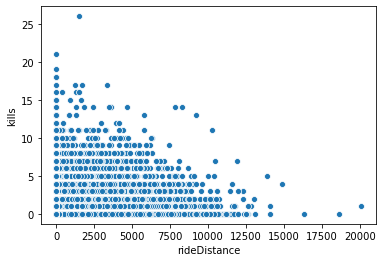

In [183]:
sns.scatterplot(data.rideDistance,data.kills)

#### The lesser the ride distance higher the kills!!

## A peek at road kills

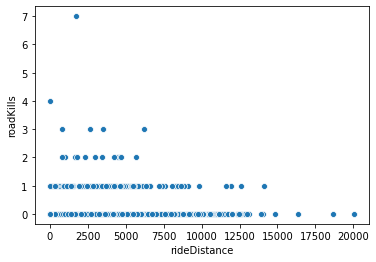

In [189]:
sns.scatterplot(data.rideDistance,data.roadKills)


- The maximum road kill in this sample is 7
- 4 road kills hasn't travelled much 
- These kills cannot be considered as the actual kills